In [179]:
require 'unsup';
require 'nn';
require 'image';
require 'optim';
require 'randomkit'

In [2]:
n_hidden = 50
n_input = 32*32

In [296]:
t = torch.Timer()
train = torch.load('mnist.t7/train_32x32.t7', 'ascii')
test = torch.load('mnist.t7/test_32x32.t7', 'ascii')
train = train.data
test = test.data

traindata = torch.Tensor(train:size()[1],1,32,32)
for i = 1,train:size()[1] do   
   traindata[i] = train[i]
end
traindata:div(255)
--traindata:add(-traindata:mean())
print(#test)

 10000
     1
    32
    32
[torch.LongStorage of size 4]



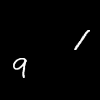

In [376]:
big = torch.Tensor(100,100):zero()
for i = 1,2 do
    n = torch.random(1,60000)
    stim = traindata[n]
    stim = stim[{{1},{2,29},{2,29}}]
    x = torch.random(1,72)
    y = torch.random(1,72)
    big[{{x,x+27}, {y,y+27}}] = torch.cmax(big[{{x,x+27}, {y,y+27}}], stim)
end
itorch.image(big)

In [140]:
t = traindata[2]
print(#traindata[2])
--stim = traindata[{{2,30},{2,30}}]

  1
 32
 32
[torch.LongStorage of size 3]



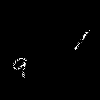

In [467]:
noise = torch.Tensor(#big):bernoulli(0.5) --randomkit.bernoulli(torch.Tensor(#big),1,0.1)
corrupted = torch.cmul(big,noise)
itorch.image(corrupted)

In [451]:
%%R

[string "%%R..."]:1: unexpected symbol near '%': 